Iterations ENKF Model 1:   9%|▉         | 32/348 [00:45<07:33,  1.44s/it]c:\Users\y-osw\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\agent1_class.py:58: RuntimeWarning: divide by zero encountered in divide
  self.g_rate = (self.wealth_list[-1] / self.wealth_list[-2]) - 1
Iterations ENKF Model 1:  26%|██▋       | 92/348 [02:11<05:58,  1.40s/it]c:\Users\y-osw\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\agent1_class.py:58: RuntimeWarning: invalid value encountered in scalar divide
  self.g_rate = (self.wealth_list[-1] / self.wealth_list[-2]) - 1
Iterations ENKF Model 1: 100%|██████████| 348/348 [00:57<00:00,  6.03it/s]
c:\Users\y-osw\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:212: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\y-osw\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_

this is total_wealth_ts [[ 1919090.80253253  1919476.89224361  1925280.16713372 ...
  13751186.45651525 13778669.66311599 13849486.33670416]
 [ 1330911.87669662  1334221.37132466  1334221.37132466 ...
  11440393.75844133 11459240.26421354 11459240.26421354]
 [  665794.79939905   665794.79939905   665794.79939905 ...
   9764562.05569733  9776277.69288484  9791790.9597002 ]
 ...
 [ 1774956.47302663  1806912.2024137   1806912.2024137  ...
  13255802.30173275 13292729.57131604 13335653.43842261]
 [ 5638033.77688928  5639764.05652301  5644965.58770245 ...
  13371174.68463058 13429239.27548418 13453923.47917066]
 [ 1617115.74345988  1627133.85834605  1628490.44625991 ...
  15214025.71454145 15258079.71994616 15258079.71994616]]
this is total_wealth_ts [[10661348.31214481 10678336.25943246 10697293.62407347 ...
  31771235.70734906 31837980.63766515 31913518.42282587]
 [ 7904535.77904501  7920421.35325962  7950931.42039468 ...
  27793768.86084483 27840212.03578353 27894844.58741065]
 [ 4540555

C:\Users\y-osw\AppData\Local\Temp\ipykernel_7852\3409609206.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
C:\Users\y-osw\AppData\Local\Temp\ipykernel_7852\3409609206.py:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


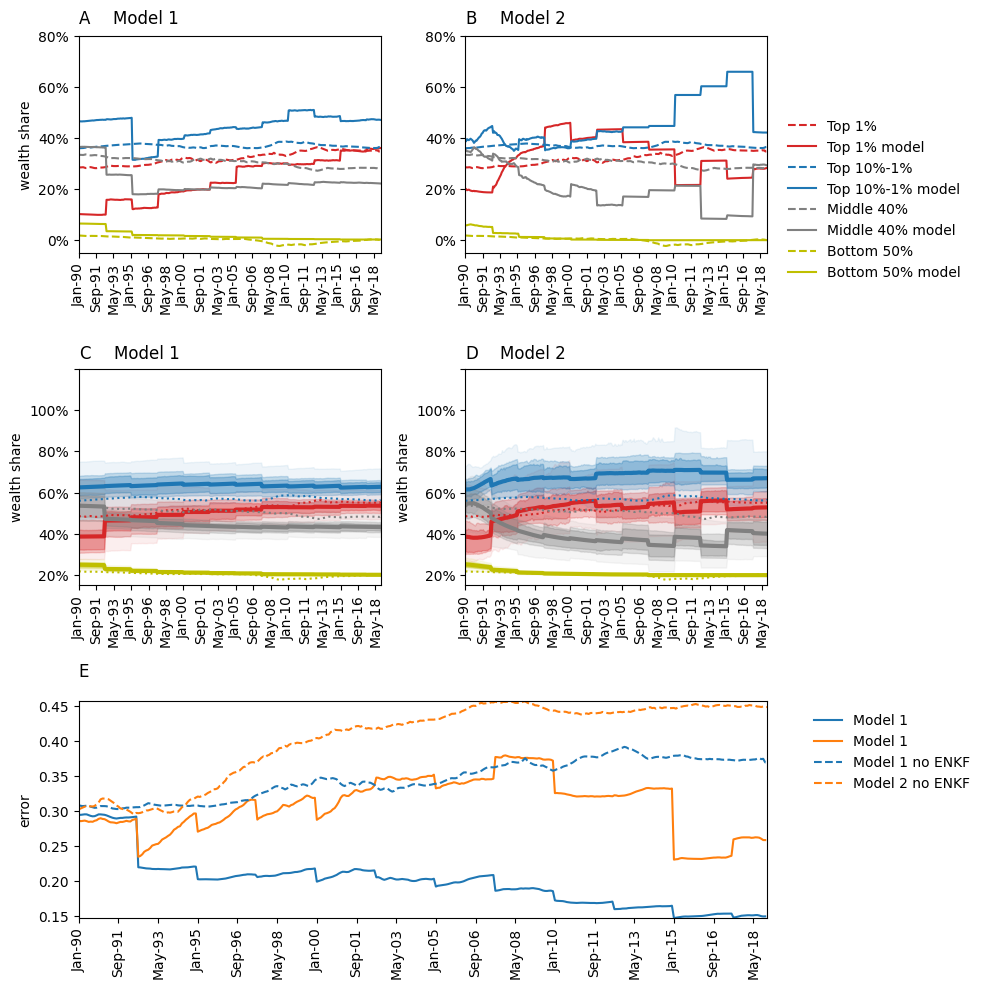

In [1]:
#General packages
import os
import numpy as np
from tqdm import tqdm  ### package for progress bars
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
### MODEL 1 infrastructure
import pandas as pd
from model1_class import Model1
from run_enkf import *
### MODEL 2 infrastructure
from model2_class import Model2
#from run_both_models_n_times_and_compute_error import *
import import_ipynb

#%%


class Experiment1:
    def __init__(self, num_agents, ensemble_size, macro_state_dim, time_horizon, filter_freq):
        self.num_agents = num_agents
        self.ensemble_size = ensemble_size
        self.macro_state_dim = macro_state_dim
        self.enkf1 = None
        self.enkf2 = None
        self.time_horizon = time_horizon

    def run_both_enkf(self, time_horizon, filter_freq):
        
        model_params1 = {"population_size": 100,
         "growth_rate": 0.025,
         "b_begin": 1.3,
         "distribution": "Pareto_lognormal",
         "start_year": 1990,
         "uncertainty_para": 0.1}
        
        model_params2 = {"population_size": 100, 
                        "concavity": 1,
                        "growth_rate": 0.025, 
                        "start_year": 1990,
                        "adaptive_sensitivity": 0.02,
                        "uncertainty_para": 0}

        
        self.enkf1 = prepare_enkf(Model1,
                                  model_params= model_params1,
                                  ensemble_size = self.ensemble_size,
                                  macro_state_dim = self.macro_state_dim,
                                  filter_freq = filter_freq,
                                  uncertainty_obs = 0.5)
        self.enkf2 = prepare_enkf(Model2, model_params= model_params2,
                                  ensemble_size = self.ensemble_size,
                                  macro_state_dim = self.macro_state_dim,
                                  filter_freq = filter_freq,
                                  uncertainty_obs = 0.5)
        
        run_enkf(self.enkf1, self.time_horizon, filter_freq = filter_freq)
        run_enkf(self.enkf2, self.time_horizon, filter_freq = filter_freq)

    def plot_results(self):
        fig = plt.figure(figsize=(10, 10))
        # Create a gridspec object
        gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
        # Create individual subplots
        ax0 = plt.subplot(gs[0, 0])
        ax1 = plt.subplot(gs[0, 1])
        ax2 = plt.subplot(gs[1, 0])
        ax3 = plt.subplot(gs[1, 1])
        ax4 = plt.subplot(gs[2, :])  # This one spans both columns

        
        self.enkf1.models[0].plot_wealth_groups_over_time(ax0, self.time_horizon)
        self.enkf2.models[0].plot_wealth_groups_over_time(ax1, self.time_horizon)
        self.enkf1.plot_fanchart(ax2)
        self.enkf2.plot_fanchart(ax3)        
        self.enkf1.plot_error(ax4)
        self.enkf2.plot_error(ax4)

        ###EXTRAS
        #AX0
        ax0.text(0, 0.85, 'A', fontsize = 12)
        ax0.text(40, 0.85, 'Model 1', fontsize = 12)
        #AX1
        ax1.legend(loc=(1.05, -0.15), frameon = False) ### legend only here
        ax1.text(0, 0.85, 'B', fontsize = 12)
        ax1.text(40, 0.85, 'Model 2', fontsize = 12)
        #AX2
        ax2.text(0, 1.05, 'C', fontsize = 12)
        ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
        ax2.text(40,1.05, 'Model 1', fontsize = 12)
        #AX3
        ax3.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
        ax3.text(0,1.05, 'D', fontsize = 12)
        ax3.text(40,1.05, 'Model 2', fontsize = 12)

        path = '..'
        with open(os.path.join(path, 'data', 'mean_errors.csv')) as f:
            errors_df_no_enkf = pd.read_csv(f, encoding='unicode_escape')

        ax4.plot(errors_df_no_enkf['mean_error_model1'], linestyle='--', label='Model 1 no ENKF', color='tab:blue')
        ax4.plot(errors_df_no_enkf['mean_error_model2'], linestyle='--', label='Model 2 no ENKF', color='tab:orange')
        ax4.legend(bbox_to_anchor=(1.05, 1), frameon=False)
        
        # Get the limits
        x_min, x_max = ax4.get_xlim()
        y_min, y_max = ax4.get_ylim()
        ax4.text(0, y_max+0.02, 'E', fontsize = 12)
        ax4.margins(0)


        plt.tight_layout()
        plt.savefig('fig4.png', dpi=300)
        plt.show()

# Example usage
if __name__ == "__main__":
    time = 29*12
    filter_freq = 30
    experiment1 = Experiment1(num_agents=100, 
                              ensemble_size=100, 
                              macro_state_dim=4, 
                              time_horizon = time,
                              filter_freq = filter_freq)
    experiment1.run_both_enkf(time_horizon = time, filter_freq = filter_freq)
    experiment1.plot_results()

In [2]:
test = experiment1.enkf1.obs